In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(20.0,10.0)

In [5]:
data =  pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [23]:
X= data['Head Size(cm^3)'].values
Y= data['Brain Weight(grams)'].values

In [24]:
mean_x= np.mean(X)
mean_y= np.mean(Y)

In [25]:
n= len(X)
print(n)
numer=0
denom=0

for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2

print(numer)
print(denom)
m=numer/denom
print(m)
c=mean_y-(m*mean_x)
print(c)

237
8294376.74683544
31486153.983122338
0.26342933948939945
325.57342104944223


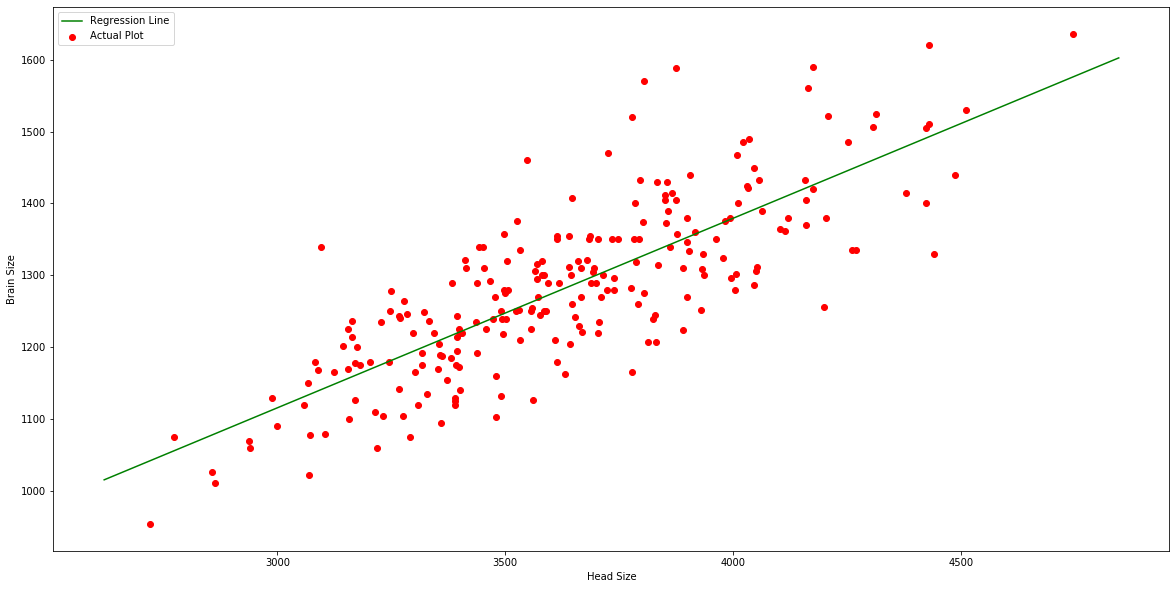

In [27]:
maxX= np.max(X)+100
minX= np.min(X)-100
x=np.linspace(minX,maxX,1000)
y=(m*x)+c
plt.plot(x,y,color='green',label='Regression Line')
plt.scatter(X,Y,color='red',label='Actual Plot')
plt.xlabel('Head Size')
plt.ylabel('Brain Size')
plt.legend()
plt.show()

In [31]:
nsqrd=0
dsqrd=0
for i in range(n):
    ypred=(m*X[i])+c
    nsqrd+= (ypred-mean_y)**2
    dsqrd+=(Y[i]-mean_y)**2
rsqrd=(nsqrd/dsqrd)
print(rsqrd)

0.6393117199570001


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
reg= LinearRegression()
X=X.reshape((n,1))
reg=reg.fit(X,Y)
Y_pred= reg.predict(X)

In [43]:
print(Y_pred)

[1514.16660083 1310.27229206 1448.04583661 1320.5460363  1425.9177721
 1269.96760312 1322.65347102 1263.11844029 1277.34362462 1374.5490509
 1232.56063691 1377.44677363 1284.45621679 1434.08408162 1335.03464997
 1346.62554091 1246.78582124 1238.61951172 1140.88722677 1490.98481895
 1347.15239959 1391.40852862 1327.65862847 1302.89627056 1576.07249561
 1490.72138961 1388.77423523 1385.08622448 1235.45835965 1425.39091342
 1323.1803297  1325.55119375 1406.42400097 1421.70290266 1420.91261465
 1330.29292186 1254.68870143 1312.90658546 1203.84683891 1245.46867455
 1369.28046411 1248.89325596 1462.27102095 1327.65862847 1343.2009595
 1388.24737655 1460.42701557 1159.32728053 1284.71964613 1285.50993415
 1350.576981   1324.76090573 1450.41670067 1395.88682739 1382.45193108
 1236.512077   1350.31355166 1423.02004936 1362.16787194 1292.09566764
 1343.99124752 1219.38916994 1495.72654706 1445.9384019  1307.37456933
 1202.52969221 1225.18461541 1213.85715381 1492.56539499 1479.65735735
 1381.398

In [44]:
r2_reg=reg.score(X,Y)
print(r2_reg)

0.639311719957
